# Exercices

## Exercice ACP

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition, preprocessing

data = pd.read_csv("billets.csv", sep=";")
display(data)
data = data.dropna()

standard_scaler = preprocessing.StandardScaler()

billets_data = standard_scaler.fit_transform(data[data.columns[1:]])

pca = decomposition.PCA()
billets_pca = pca.fit_transform(billets_data)

billetspca = pd.DataFrame(billets_pca, index=data.index, columns=["PC"+str(i+1) for i in range(6)])
billetspca

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


,PC1,PC2,PC3,PC4,PC5,PC6
0,1.627035,0.807294,2.192500,3.328620,0.328611,0.002057
1,-2.017133,-2.217975,-1.011861,0.043402,0.043670,-0.468112
2,-0.996369,2.596334,1.241833,-0.878880,-0.868951,0.184537
3,-1.379560,-1.809941,0.594839,0.890183,0.805023,-0.213295
4,0.138409,-0.597355,0.976431,-1.737647,1.147098,-0.295813
...,...,...,...,...,...,...
1495,1.415019,-0.260032,0.912233,0.600323,-0.236258,-1.315906
1496,3.261672,1.330325,0.601857,0.367258,-0.106580,-0.546738
1497,1.878843,-0.599267,-0.532782,-0.117704,-0.297130,0.497393
1498,1.775458,0.506379,0.067710,-0.483507,0.344075,0.523804


In [3]:
pca.explained_variance_ratio_

array([0.43123527, 0.16970651, 0.13136423, 0.11792169, 0.0962036 ,
       0.0535687 ])

In [4]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.12, 16.97, 13.14, 11.79,  9.62,  5.36])

In [5]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

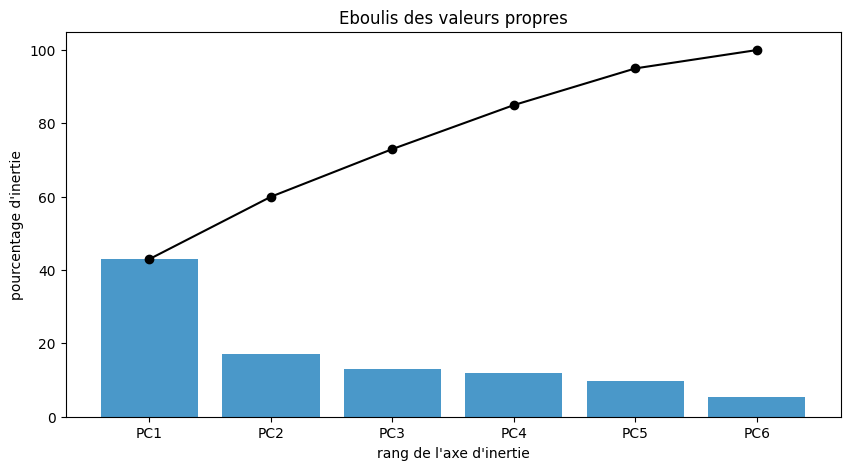

In [6]:
import matplotlib as cm


x_list = ['PC'+str(i) for i in range(1,len(pca.explained_variance_ratio_)+1)]


plt.figure(figsize = (10,5))
plt.bar(x_list, scree, color=plt.get_cmap('Blues')(0.6))
plt.plot(x_list, scree_cum,c="black",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [7]:
pca.components_

array([[-0.08665869,  0.32639189,  0.39411317,  0.50716247,  0.44086543,
        -0.52825876],
       [ 0.93857808,  0.30944961,  0.12372404, -0.07250949, -0.01019808,
         0.0514087 ],
       [-0.2824417 ,  0.88813192, -0.21657887, -0.10352683, -0.23314037,
         0.13953399],
       [-0.13448374,  0.00231223,  0.84897171, -0.09056254, -0.47074863,
         0.17705924],
       [-0.11691265,  0.09434574,  0.24824139, -0.57272256,  0.70502823,
         0.3012152 ],
       [ 0.00580477,  0.00494918,  0.00916594,  0.62497848,  0.18030579,
         0.75944027]])

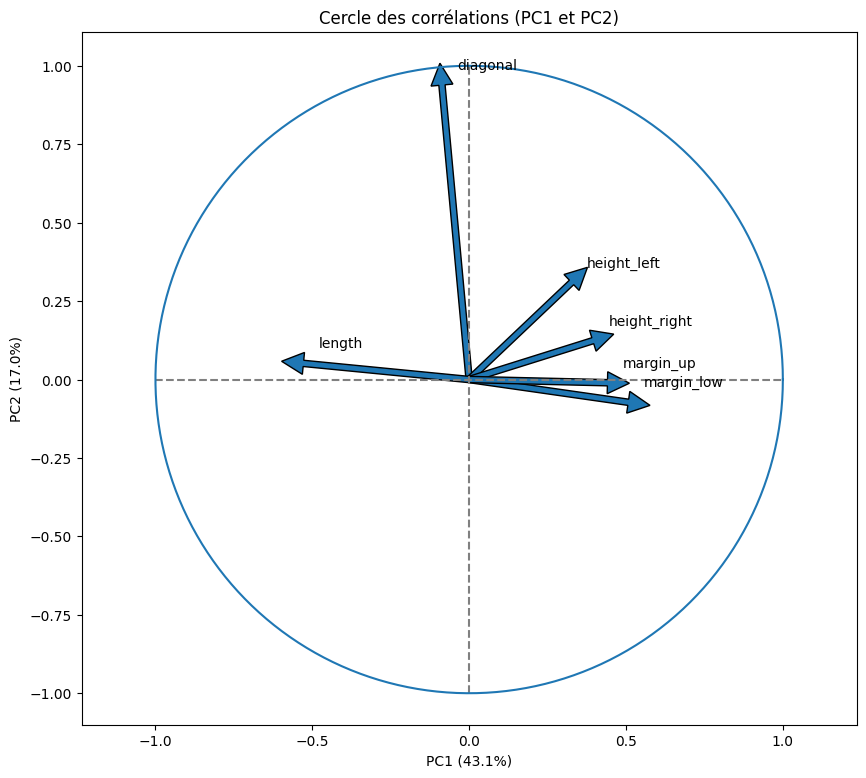

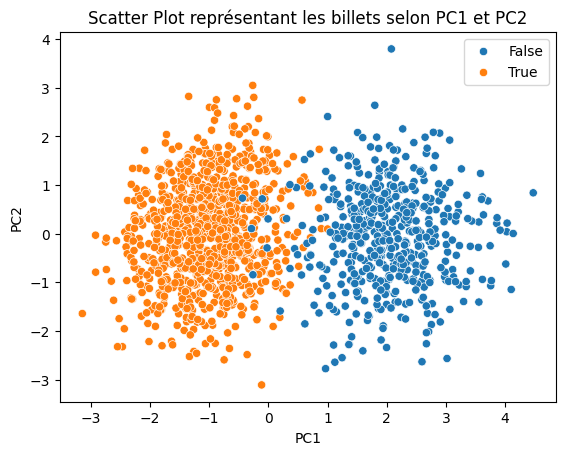

In [8]:
features = data[data.columns[1:]].columns  # toutes les varaibles sauf la target
x, y = 0,1 # indices correspondant à PC1 et PC2

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):  # on choisit toutes les variables
    ax.arrow(0, # abscisse de départ de la flèceh (ici l'origine)
             0,  # ordonnée de départ de la flèche (ici l'origine)
             pca.components_[x, i],  # coordonnée de la flèche sur PC1
             pca.components_[y, i],  # coordonnée de la flèche sur PC2
             head_width=0.07, # Largeur de la tête de la flèche
             head_length=0.07, # Longueur de la tête de la flèche
             width=0.02,) # Largeur du corps de la flèche             

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--') # trace l'axe horizontal en faisant passer par les points (-1,0) et (1,0)
plt.plot([0, 0], [-1, 1], color='grey', ls='--') # trace l'axe vertical en faisant passer par les points (0,1) et (0,-1)


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 200)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)

import seaborn as sns
billetspca['target']=data[['is_genuine']]
sns.scatterplot(x=billetspca.PC1, y= billetspca.PC2,hue=billetspca.target)


plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot représentant les billets selon PC1 et PC2')

# Affichage du tracé
plt.show()

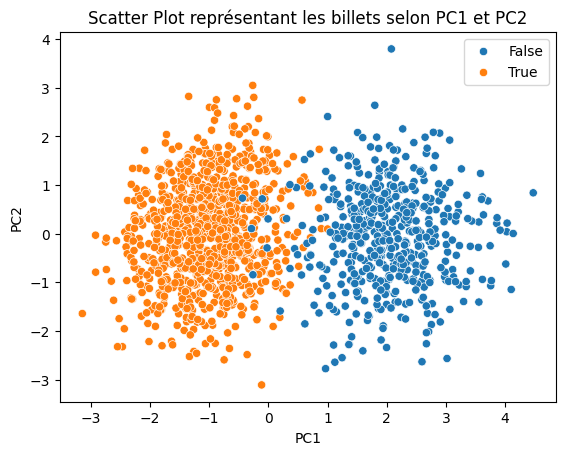

In [9]:
import seaborn as sns
billetspca['target']=data[['is_genuine']]
sns.scatterplot(x=billetspca.PC1, y= billetspca.PC2,hue=billetspca.target)


plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot représentant les billets selon PC1 et PC2')

# Affichage du tracé
plt.show()


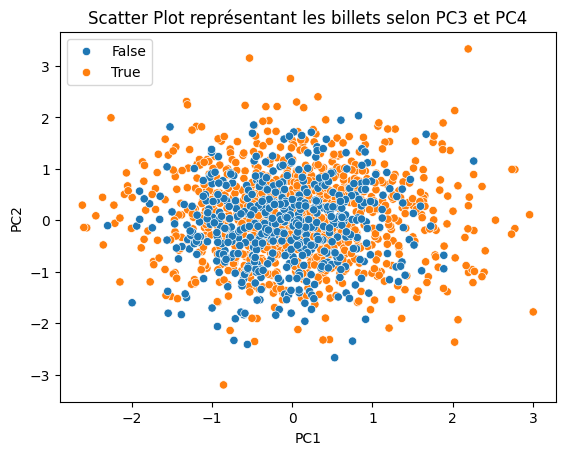

In [10]:
import seaborn as sns
billetspca['target']=data[['is_genuine']]
sns.scatterplot(x=billetspca.PC3, y= billetspca.PC4,hue=billetspca.target)


plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot représentant les billets selon PC3 et PC4')

# Affichage du tracé
plt.show()

## Exercice Pycaret

Vous allez à présent détecter de faux billets !

Vous aurez à disposition un jeu de données contenant différentes variables :

1. **is_genuine** : target, nous dit si le billet est un vrai billet ou non.
2. **toutes les autres variables sont des tailles exprimées en cm**

1. Préparation des données

*N'oubliez pas que Pycaret ne réalise pas toutes les étapes de nettoyage !*

In [11]:
import pandas as pd
data = pd.read_csv("billets.csv", sep=";")
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


2. Installez et Importez Pycaret 

In [12]:
from pycaret.classification import *

3. Créez un environnement Pycaret

In [13]:
X = data.drop("is_genuine", axis=1)
y = data.is_genuine

session = setup(data=X, target=y, normalize=True, train_size=0.8, data_split_stratify=True, fold=2, session_id=0)

,Description,Value
0,Session id,0
1,Target,is_genuine
2,Target type,Binary
3,Original data shape,"(1500, 7)"
4,Transformed data shape,"(1500, 7)"
5,Transformed train set shape,"(1200, 7)"
6,Transformed test set shape,"(300, 7)"
7,Numeric features,6
8,Rows with missing values,2.5%
9,Preprocess,True


4. Comparez les modèles et sélectionnez le meilleur

In [14]:
from pycaret.classification import compare_models
top_models = compare_models( sort="Accuracy")
print(top_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9908,0.9986,0.9962,0.9901,0.9931,0.9793,0.9794,0.9450
nb,Naive Bayes,0.9908,0.9991,0.9950,0.9913,0.9931,0.9793,0.9794,0.7000
svm,SVM - Linear Kernel,0.9908,0.0000,0.9950,0.9913,0.9931,0.9793,0.9794,0.0300
qda,Quadratic Discriminant Analysis,0.9908,0.9991,0.9950,0.9913,0.9931,0.9793,0.9794,0.0300
et,Extra Trees Classifier,0.9908,0.9992,0.9962,0.9901,0.9931,0.9793,0.9794,0.1650
rf,Random Forest Classifier,0.9900,0.9992,0.9950,0.9901,0.9925,0.9774,0.9775,0.1800
knn,K Neighbors Classifier,0.9892,0.9912,0.9950,0.9888,0.9919,0.9756,0.9756,0.6850
gbc,Gradient Boosting Classifier,0.9892,0.9985,0.9938,0.9900,0.9919,0.9756,0.9756,0.0950
ada,Ada Boost Classifier,0.9875,0.9984,0.9912,0.9900,0.9906,0.9719,0.9719,0.0750
lda,Linear Discriminant Analysis,0.9875,0.9985,0.9975,0.9840,0.9907,0.9717,0.9719,0.0300


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [15]:
qda_model = create_model("qda")
print(qda_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9917,0.9991,0.9950,0.9925,0.9938,0.9812,0.9812
1,0.9900,0.9990,0.9950,0.9900,0.9925,0.9774,0.9775
Mean,0.9908,0.9991,0.9950,0.9913,0.9931,0.9793,0.9794
Std,0.0008,0.0000,0.0000,0.0012,0.0006,0.0019,0.0019


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


5. Effectuez des prévisions sur vos données

In [16]:
predict_model(qda_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9967,1.0000,1.0000,0.9950,0.9975,0.9925,0.9925


,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,prediction_label,prediction_score
347,172.460007,103.779999,103.540001,3.89,3.20,113.050003,True,1,1.0000
451,172.169998,103.790001,103.540001,4.07,2.78,113.029999,True,1,1.0000
1028,171.740005,104.050003,103.930000,5.38,3.49,111.339996,False,0,1.0000
677,172.050003,103.900002,103.760002,4.52,2.71,113.419998,True,1,1.0000
690,172.330002,103.830002,103.540001,3.98,3.18,113.309998,True,1,1.0000
...,...,...,...,...,...,...,...,...,...
325,171.960007,104.169998,103.349998,4.35,3.31,113.669998,True,1,0.9999
507,171.970001,104.050003,104.110001,4.15,2.99,113.660004,True,1,0.9999
664,172.050003,103.699997,103.750000,5.04,2.27,113.550003,True,1,1.0000
415,172.000000,103.680000,104.099998,3.84,3.15,112.860001,True,1,0.9997


## Exercice SVM, K-NearestNeighbors, Naïve-Bayes et les méthodes Stochastiques

Correction exercice SVM (Titanic)

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

df = pd.read_csv('titanic.csv')
df = df[["pclass", "survived", "sex", "age", "fare", "embarked"]]
df = df.dropna()

gender_map = {'male' : 0, 'female': 1}
df["sex"] = df["sex"].map(gender_map)

X = df[["pclass", "sex", "age", "fare"]]
y = df.survived

svm_clf = svm.SVC(kernel='linear', C=100, class_weight='balanced')
# autre méthode
svm_model = LinearSVC()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df["sex"], random_state=42)

svm_clf.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("F1:", f1)
print("Accuracy:", accuracy)

Suite aux résultats obtenus grâce à Pycaret, essayez d'améliorer le score des SVM en modifiant certains paramètres.

In [17]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

data = pd.read_csv("billets.csv", sep=";")
data = data.dropna()

X = data.drop("is_genuine", axis=1)
y = data.is_genuine

svm_clf = svm.SVC(kernel='linear')
# autre méthode
svm_model = LinearSVC()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_clf.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("F1:", f1)
print("Accuracy:", accuracy)

F1: 1.0
Accuracy: 1.0


Suite aux résultats obtenus grâce à Pycaret, essayez d'améliorer le score de K-NN en modifiant certains paramètres.

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


X=billets_data
y=data['is_genuine']

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.4,random_state=101)

for i in range(1,20):
    modele = KNeighborsClassifier(n_neighbors=i)

    modele.fit(X_train,y_train)

    print(f'Accuracy avec n_neighbors:{i} : {modele.score(X_test,y_test)}')

Accuracy avec n_neighbors:1 : 0.984641638225256
Accuracy avec n_neighbors:2 : 0.9829351535836177
Accuracy avec n_neighbors:3 : 0.984641638225256
Accuracy avec n_neighbors:4 : 0.9812286689419796
Accuracy avec n_neighbors:5 : 0.9863481228668942
Accuracy avec n_neighbors:6 : 0.984641638225256
Accuracy avec n_neighbors:7 : 0.9863481228668942
Accuracy avec n_neighbors:8 : 0.9812286689419796
Accuracy avec n_neighbors:9 : 0.984641638225256
Accuracy avec n_neighbors:10 : 0.9812286689419796
Accuracy avec n_neighbors:11 : 0.9829351535836177
Accuracy avec n_neighbors:12 : 0.9812286689419796
Accuracy avec n_neighbors:13 : 0.9812286689419796
Accuracy avec n_neighbors:14 : 0.9812286689419796
Accuracy avec n_neighbors:15 : 0.9812286689419796
Accuracy avec n_neighbors:16 : 0.9812286689419796
Accuracy avec n_neighbors:17 : 0.9829351535836177
Accuracy avec n_neighbors:18 : 0.9829351535836177
Accuracy avec n_neighbors:19 : 0.9829351535836177


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X=data.drop('is_genuine', axis=1)
y=data['is_genuine']

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.4,random_state=101)



preprocessor= ColumnTransformer(
    transformers=[('num',StandardScaler(),X.columns)],remainder='passthrough'
)

pipeline = Pipeline([('preprocessor',preprocessor),('model',KNeighborsClassifier())])

param_grid = {

    'model__n_neighbors': np.arange(1,20,1),
    'model__weights':['uniform', 'distance'],
    'model__p': [1, 2],
}

grid_search = GridSearchCV(pipeline,param_grid,cv=5)

grid_search.fit(X_train,y_train)
print('meilleures paramètres:',grid_search.best_params_)


best_model=grid_search.best_estimator_

print(f'Accuracy : {best_model.score(X_test,y_test)}')


meilleures paramètres: {'model__n_neighbors': 12, 'model__p': 2, 'model__weights': 'uniform'}
Accuracy : 0.9812286689419796


Suite aux résultats obtenus grâce à Pycaret, essayez d'améliorer le score du modèle Naïve-Bayes en modifiant certains paramètres.

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [21]:
data = pd.read_csv("billets.csv", sep=";")
data = data.dropna()

X = data.drop("is_genuine", axis=1)
y = data.is_genuine

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#GaussianNB

classifier_gaussian = GaussianNB()
classifier_gaussian.fit(X_train, y_train)
y_pred = classifier_gaussian.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        96
        True       1.00      1.00      1.00       197

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



In [23]:
#BernouilliNB

binarizer = Binarizer(threshold=2.0)
X_train_bin = binarizer.transform(X_train)
X_test_bin = binarizer.transform(X_test)
classifier_bernouilli = BernoulliNB()
classifier_bernouilli.fit(X_train_bin, y_train)
y_pred = classifier_bernouilli.predict(X_test_bin)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 0.6723549488054608

Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00        96
        True       0.67      1.00      0.80       197

    accuracy                           0.67       293
   macro avg       0.34      0.50      0.40       293
weighted avg       0.45      0.67      0.54       293



In [24]:
#MultinomialNB

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_binned = discretizer.fit_transform(X_train)
X_test_binned = discretizer.transform(X_test)
classifier_multinomial = MultinomialNB()
classifier_multinomial.fit(X_train_binned, y_train)
y_pred = classifier_multinomial.predict(X_test_binned)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 0.962457337883959

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.89      0.94        96
        True       0.95      1.00      0.97       197

    accuracy                           0.96       293
   macro avg       0.97      0.94      0.96       293
weighted avg       0.96      0.96      0.96       293



In [25]:
#ComplementNB

classifier_complement = ComplementNB()
classifier_complement.fit(X_train, y_train)
y_pred = classifier_complement.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 0.9692832764505119

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.96      0.95        96
        True       0.98      0.97      0.98       197

    accuracy                           0.97       293
   macro avg       0.96      0.97      0.97       293
weighted avg       0.97      0.97      0.97       293



In [26]:
#CategoricalNB

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_binned = discretizer.fit_transform(X_train)
X_test_binned = discretizer.transform(X_test)
classifier_categorical = CategoricalNB()
classifier_categorical.fit(X_train_binned, y_train)
y_pred = classifier_categorical.predict(X_test_binned)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy: 0.9863481228668942

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.98      0.98        96
        True       0.99      0.99      0.99       197

    accuracy                           0.99       293
   macro avg       0.98      0.98      0.98       293
weighted avg       0.99      0.99      0.99       293



Faites de même pour les méthodes Stochastiques.

In [27]:
# Codez ici